In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import os
from sklearn.preprocessing import StandardScaler

df2 = pd.read_csv("/Users/gustavosganzerla/Documents/multi_organisms/bacteria/classif/datasets_to_classify/v2/synechocistis_1_0.csv")
path = '/Users/gustavosganzerla/Documents/multi_organisms/bacteria/classif/datasets_to_classify/v2/'

df2 = pd.read_csv("/Users/gustavosganzerla/Documents/multi_organisms/bacteria/classif/datasets_to_classify/all.csv")



In [2]:
filenames = os.listdir(path)

df_list = []
for item in filenames:
    if '.csv' in item and 'pseudonomas' not in item and 'all' not in item:
        df_list.append(pd.read_csv(path+item))

result = pd.concat(df_list[0:1], ignore_index=True)
        
for i in range(1,len(df_list)):
    result = pd.concat([result, df_list[i]], ignore_index=True)
result


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,label
0,0,-1.44,-1.84,-2.27,-1.84,-1.45,-1.30,-1.84,-1.30,-1.45,...,-1.30,-1.00,-1.00,-1.30,-1.84,-1.84,-2.27,-1.28,-1.00,1
1,1,-1.45,-1.45,-0.88,-1.00,-1.44,-2.27,-1.45,-1.45,-1.84,...,-1.28,-1.00,-1.44,-1.84,-2.27,-1.45,-1.30,-1.44,-0.58,1
2,2,-1.84,-1.45,-0.88,-1.44,-1.84,-1.44,-1.00,-1.44,-2.27,...,-0.88,-1.00,-1.44,-2.27,-1.84,-1.28,-1.00,-1.44,-1.84,1
3,3,-2.24,-1.30,-0.88,-1.28,-2.24,-2.27,-1.84,-1.28,-1.44,...,-1.84,-1.28,-1.28,-1.28,-1.44,-1.84,-1.84,-1.84,-1.30,1
4,4,-1.45,-1.45,-0.88,-0.58,-1.30,-2.27,-1.84,-1.45,-0.88,...,-1.28,-0.58,-1.30,-1.44,-1.28,-1.28,-1.44,-1.44,-1.44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29418,control1325,-1.84,-1.84,-1.30,-1.45,-1.45,-0.88,-1.00,-1.00,-1.00,...,-1.84,-2.27,-2.24,-1.84,-2.27,-2.24,-1.30,-1.00,-1.30,0
29419,control1326,-1.30,-1.45,-1.28,-1.44,-1.44,-1.00,-0.58,-1.00,-1.45,...,-1.44,-1.00,-0.58,-1.00,-1.00,-1.00,-0.88,-1.44,-1.84,0
29420,control1327,-2.24,-1.84,-1.84,-2.27,-1.28,-1.44,-1.30,-0.88,-0.58,...,-0.58,-1.45,-1.28,-1.28,-1.28,-1.28,-2.24,-2.27,-1.45,0
29421,control1328,-0.88,-0.58,-1.30,-2.27,-1.45,-1.30,-1.30,-1.00,-1.45,...,-2.27,-1.28,-1.44,-1.30,-1.45,-1.28,-0.58,-0.88,-1.28,0


In [3]:
X = result.iloc[:, 21:98].values
y = result.iloc[:, 100].values




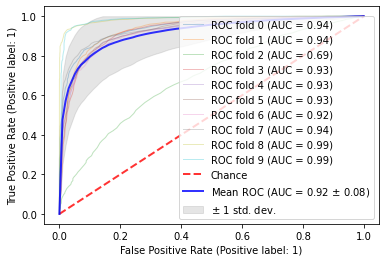

In [4]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import statistics as st
from sklearn import svm
import xgboost as xgb

#from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve
list_roc = []
general_accuracy = []
general_precision = []
general_recall = []
general_specificity = []

for k in range(1,2):
        # Run classifier with cross-validation and plot ROC curves
    random_state = np.random.RandomState(0)
    cv = StratifiedKFold(n_splits=10)
    
    rf = RandomForestClassifier(n_estimators = 100, oob_score=True)

    tprs = []
    aucs = []
    accuracy_list = []
    precision_list = []
    recall_list = []
    pred_lists = []
    specificity_list = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(X, y)):

        rf.fit(X[train], y[train])
        ##classification metrics
        y_pred = rf.predict(X[test])
        
        accuracy_list.append(metrics.accuracy_score(y_pred, y[test]))
        precision_list.append(metrics.precision_score(y_pred, y[test]))
        recall_list.append(metrics.recall_score(y_pred, y[test]))
        tn, fp, fn, tp = confusion_matrix(y_pred, y[test]).ravel()
        specificity_list.append(tn/(tn+fp))
        

        #pd.DataFrame(y_pred).to_csv("~/Documents/multi_organisms/bacteria/classif/missclassification/y_pred_fold_n"+str(i)+".csv")
        #pd.DataFrame(y[test]).to_csv("~/Documents/multi_organisms/bacteria/classif/missclassification/y_test_fold_n"+str(i)+".csv")
        #pd.DataFrame(X[test]).to_csv("~/Documents/multi_organisms/bacteria/classif/missclassification/X_test_fold_n"+str(i)+".csv")

        ###roc visualization
        viz = RocCurveDisplay.from_estimator(
            rf,
            X[test],
            y[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="",
    )
    ax.legend(loc="lower right")
    plt.show()
    
    list_roc.append(mean_auc)
    general_accuracy.append(st.mean(accuracy_list))
    general_precision.append(st.mean(precision_list))
    general_recall.append(st.mean(recall_list))
    general_specificity.append(st.mean(specificity_list))
    
    #list_misclassification = pd.DataFrame(list_misclassification)
    #list_predicted = pd.DataFrame(list_predicted)
    #list_actual = pd.DataFrame(list_actual)
    



In [33]:
import statistics as st
print(st.mean(accuracy_list))
print(st.mean(precision_list))
print(st.mean(recall_list))
print(st.mean(specificity_list))

0.8364936166497234
0.8016602691184475
0.8709435687925672
0.8249415300621776


In [33]:
performance = pd.DataFrame()

performance['accuracy'] = general_accuracy
performance['precision'] = general_precision
performance['recall'] = general_recall
performance['specificity'] = general_specificity
performance['mean_roc'] = list_roc

performance.to_csv("/Users/gustavosganzerla/Documents/multi_organisms/bacteria/results/RF_performance.csv")

[11:09:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:09:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




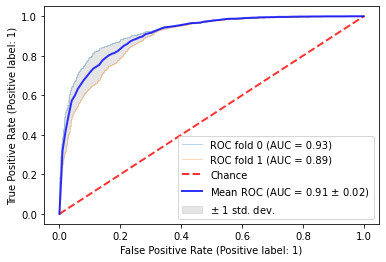

In [5]:
misclassification = pd.read_csv("/Users/gustavosganzerla/Documents/multi_organisms/bacteria/classif/missclassification/FP_FN_sampled.csv")
X2 = misclassification.iloc[:, 21:98].values
y2 = misclassification['label']

# Run xgboost with cross-validation and plot ROC curves
random_state = np.random.RandomState(0)
cv = StratifiedKFold(n_splits=2)
#xgboost = svm.SVC(kernel="rbf", probability=True, random_state=random_state, gamma='auto')
#xgboost = RandomForestxgboost(n_estimators = 1000, oob_score=True) 
xgboost = xgb.XGBClassifier(objective="binary:logistic", random_state=random_state,
                              silent = False,
                              eta = 0.2,
                              max_depth = 10)
tprs = []
aucs = []
accuracy_list = []
precision_list = []
recall_list = []
pred_lists = []
specificity_list = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X2, y2)):
    xgboost.fit(X2[train], y2[train])

    ###roc visualization
    viz = RocCurveDisplay.from_estimator(
        xgboost,
        X2[test],
        y2[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="",
)
ax.legend(loc="lower right")
plt.show()

In [90]:
from tqdm import tqdm

# Set input and output paths
path_validation = "/Users/gustavosganzerla/Documents/multi_organisms/bacteria/physical_analysis_ecoli/"
path_validation_out = "/Volumes/sd/lists_of_promoters_ecoli/"

# Load validation files and make predictions
results = []
for filename in tqdm(os.listdir(path_validation)):
    if filename.endswith(".txt"):
        
        # Load validation data
        validation = pd.read_csv(os.path.join(path_validation, filename), sep="\t", header=None)
        
        # Check if validation dataframe is not empty
        if not validation.empty:
            
            # Make predictions using loaded data
            X_validation = validation.iloc[:, 1:78].values
            validation['rf_prediction'] = rf.predict(X_validation)
            validation['xgb_prediction'] = xgboost.predict(X_validation)

            # Filter rows where RF predicts 1 and XGB predicts 0
            filtered = validation[(validation['rf_prediction'] == 1) & (validation['xgb_prediction'] == 0)]
            #print(filtered)
            # Store first column of filtered rows in a list
            values = filtered.iloc[:, 0].tolist()

            # Write values to a CSV file
            output_filename = os.path.splitext(filename)[0] + "_filtered.csv"
            output_path = os.path.join(path_validation_out, output_filename)
            pd.DataFrame({'value': values}).to_csv(output_path, index=False)
            
        else:
            print(f"The validation dataframe for {filename} is empty.")


100%|███████████████████████████████████████| 5476/5476 [12:22<00:00,  7.38it/s]


In [34]:
ecoli_validation = pd.read_csv("/Users/gustavosganzerla/Documents/multi_organisms/bacteria/classif/datasets_to_classify/validation/line_stability_all_promoters_regulondb.txt",
                              sep = "\t", header = None)

X_ecoli_validation = ecoli_validation.iloc[:, 1:78].values

df_ecoli_validation = pd.DataFrame()
df_ecoli_validation['rf'] = rf.predict(X_ecoli_validation)
df_ecoli_validation['xgb'] = xgboost.predict(X_ecoli_validation)

#df_ecoli_validation[(df_ecoli_validation['xgb'] == 0)] 
df_ecoli_validation[(df_ecoli_validation['xgb'] == 1) & (df_ecoli_validation['rf']==0)]
#df_ecoli_validation[(df_ecoli_validation['rf'] == 0) | (df_ecoli_validation['xgb']==0)]

,rf,xgb
0,0,1
1,0,1
2,0,1
3,0,1
6,0,1
...,...,...
3844,0,1
3849,0,1
3854,0,1
3855,0,1


In [32]:
rf.predict(X_ecoli_validation)

array([0, 0, 0, ..., 1, 0, 0])